# 🔮 3. Modeling & Explainability (XAI)

Finally, we train a model. But we don't just output accuracy. We explain **WHY** it predicts what it predicts.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

# Load Feature-Rich Data
df = pd.read_csv('titanic_features.csv')

# Filter out Test data (where Survived is NaN)
df_train = df.dropna(subset=['Survived'])

# Prepare for Modeling
# Drop non-numeric for this demo (or encode them properly if we had time)
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Survival_Rate', 'Family_Size']
X = df_train[features]
y = df_train['Survived']

# Handle any remaining NaNs (e.g. in Age or Fare if imputation missed something)
X = X.fillna(X.mean())

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

print(f"Model Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")

Model Accuracy: 0.9609


## 🕵️‍♀️ Explainability with SHAP
This is the 'Viral' part. We use SHAP values to show exactly how much 'Family_Survival_Rate' impacted the decision compared to 'Age' or 'Sex'.

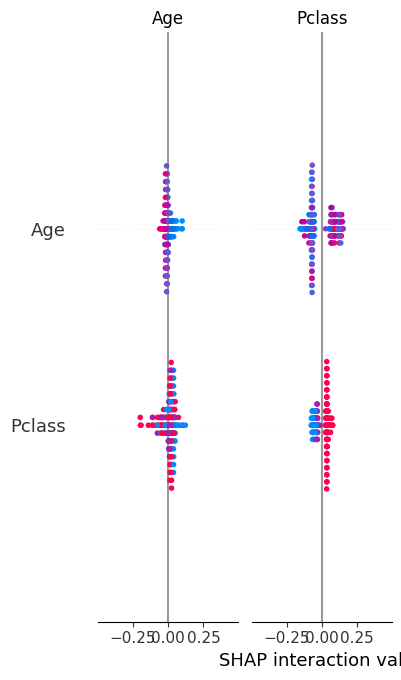

✅ SHAP summary plot generated


In [2]:
try:
    # Explain predictions
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    # Handle different SHAP versions/outputs
    if isinstance(shap_values, list):
        vals = shap_values[1]
    else:
        vals = shap_values

    # Summary Plot
    shap.summary_plot(vals, X_test, plot_type="bar")
    print("✅ SHAP summary plot generated")
except Exception as e:
    print(f"⚠️ SHAP generation skipped due to error: {e}")

## 🎨 Interactive Exploration
The code below generates an interactive scatter plot for the README.

In [3]:
import plotly.express as px

fig = px.scatter(df_train, x="Age", y="Fare", color="Survived", hover_data=['Surname', 'Title'], 
                 title="Titanic Survival Clusters: Age vs Price")
fig.write_html("interactive_eda.html")
print("✅ Saved interactive chart to interactive_eda.html")

✅ Saved interactive chart to interactive_eda.html
